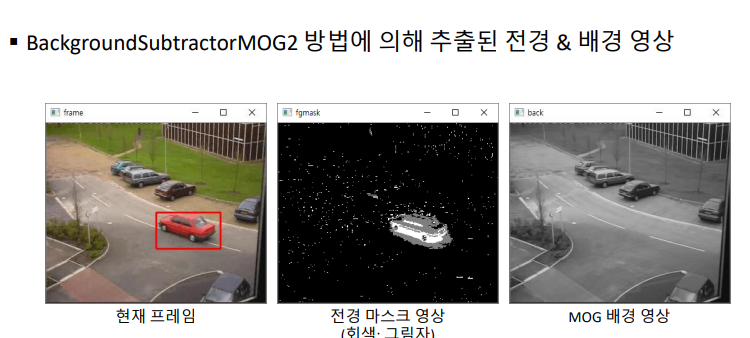

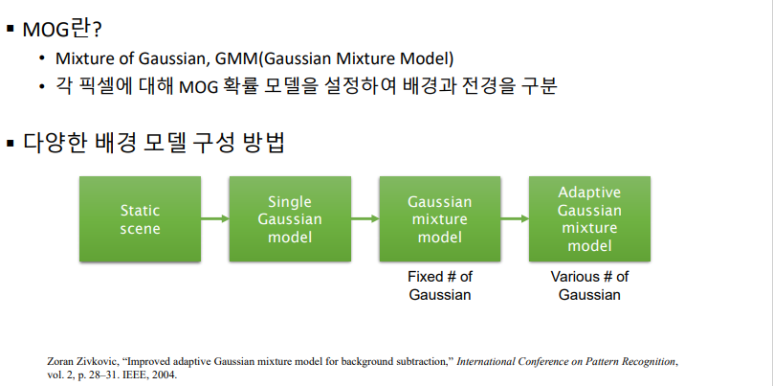

1. 첫번째 화면을 배경으로 등록합니다.  
2. 노이즈제거를 위한 가우시안모델을 합니다. 각 픽셀마다 가우시안처리합니다.  
3. 가우시안 함수를 하나가아니라 두개 이상 쓰죠.  
4. 가우시안을 몇개 쓸지 자동으로 판단합니다.

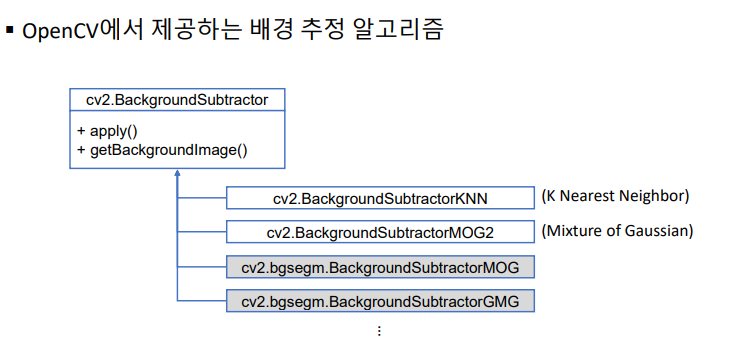

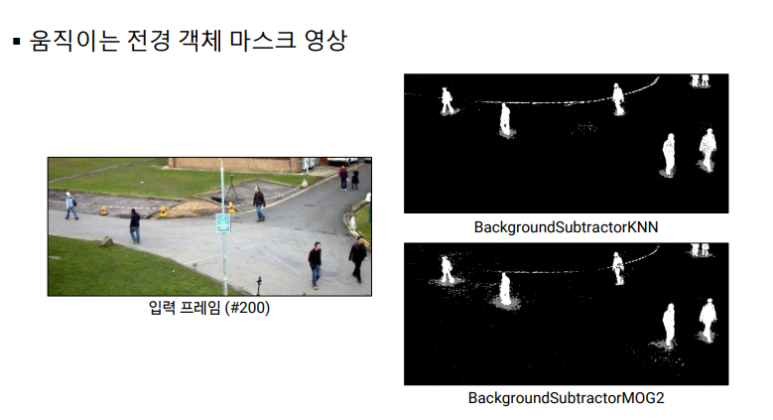

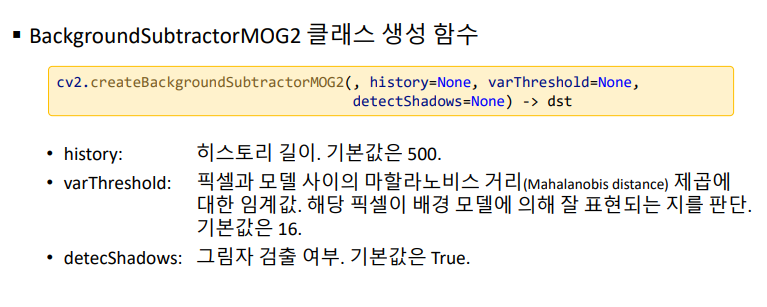
1. history : 과거 몇프레임을 쓸것인지를 설정합니다. 500이면 500프레임으로 업데이트해 줍니다.  
2. varThreshold는 16정도면 무난합니다.  
3. 기본값은 true로 그림자를 인식합니다. false면 그림자도 배경으로 인식합니다. 

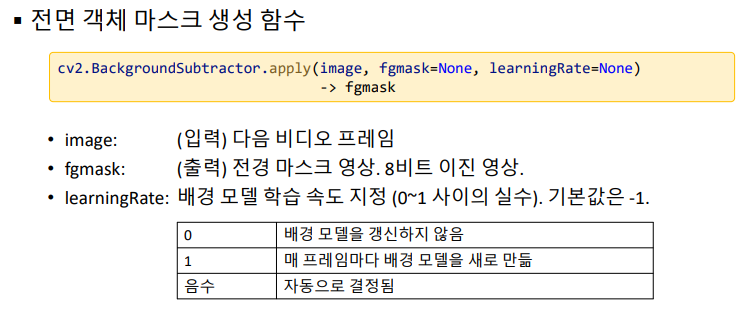
apply를 통해 현재 프레임으로 입력을 주면 자기 모델을 계속해서 업데이트 해 줍니다.
2. fgmask는 마스크 형태로 0 128 255 세개의 값으로 구성된 마스크로 리턴합니다. None으로 주면 출력으로 받는게 일반적이죠. 8비트 이진영상을 받습니다.  
3. learningRate : 얼마큼 빨리 배경모델을 업데이트할건지를 말합니다. -1을 주면 알고리즘에서 알아서 러닝메이트값을 찾아서 제공합니다. 

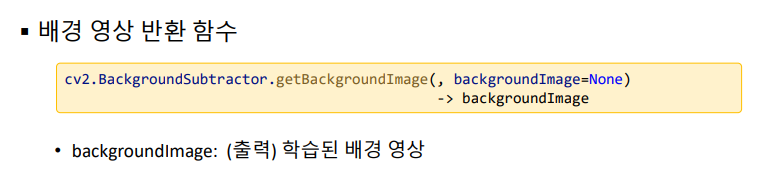
학습된 배경영상을 출력할 수 있습니다.

In [1]:
import sys 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import random 
!pip install opencv-python

In [2]:
cap = cv2.VideoCapture('PETS2000.avi')


if not cap.isOpened():

    print('Video open failed!')

    sys.exit()

배경 차분 알고리즘 객체를 생성합니다.  
그림자를 검출하지 않으려면 setDeetectShadows를 False 해주면 됩니다.

In [4]:
bs = cv2.createBackgroundSubtractorMOG2()
#bs = cv2.createBackgroundSubtractorKNN()
#bs.setDetectShadows(False) 

In [5]:
while True:

    ret, frame = cap.read()


    if not ret:

        break

    #현재 프레임을 그레이로 변환합니다.
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    #전면 객체 마스크를 리턴합니다. 
    #0 128 255 형태로 리턴합니다. 여기서 그림자를 128로 리턴합니다.
    #러닝메이트는 제공하지 않으므로 알아서 갱신합니다.
    fgmask = bs.apply(gray)

    
    #출력된 배경영상을 리턴해줍니다.
    back = bs.getBackgroundImage()


    # 레이블링을 이용하여 바운딩 박스 표시를 표시합니다.
    cnt, _, stats, _ = cv2.connectedComponentsWithStats(fgmask)


    for i in range(1, cnt):

        x, y, w, h, s = stats[i]


        if s < 80:

            continue


        cv2.rectangle(frame, (x, y, w, h), (0, 0, 255), 2)


    cv2.imshow('frame', frame)

    cv2.imshow('back', back)

    cv2.imshow('fgmask', fgmask)


    if cv2.waitKey(20) == 27:

        break


cap.release()

cv2.destroyAllWindows()